# Project Foundations for Data Science: FoodHub Data Analysis

**Marks: 40**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Suppress all warnings
import warnings
warnings.filterwarnings("ignore")

### Understanding the structure of the data

In [2]:
# Mounting Google Drive where the data is store.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Read the data '/content/drive/MyDrive/MIT-IDSS/FoodHub Data Analysis/foodhub_order.csv'
df = pd.read_csv('/content/foodhub_order.csv')
# Returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as detailed from the Data Dictionary:

*   Rows contains data regarding to the order placed by a customer.
*   Columns contains data regarding to the attributes of the order placed by the customer.

Ther are two types of variables:
*  **numerical**: order_id,	customer_id, cost_of_the_order food_preparation_time and delivery_time.
*  **non-numerical**: restaurant_name, cuisine_type,	day_of_the_week	and rating.



### **Question 1:** How many rows and columns are present in the data?

In [4]:
# Checks the shape of the dataset.
df.shape

(1898, 9)

In [5]:
# Checking for duplicated entries.
df.duplicated().sum()

0

#### Observations:
The data frame has a total of **1898 rows and 9 columns**. Rows contain values of **9 variables** describing each observation, without any duplicate entries.


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used)

In [6]:
# Use info() to print a concise summary of the DataFrame.
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
The dataset is made of 1898 entries and 9 columns below.
There are **3 different data types** in the dataset:
1.	**float64** (1)
  *   cost_of_the_orderst item

2.	**int64** (4)

  *  order_id
  *  customer_id
  *  food_preparation_time
  *  delivery_time

3.	**object** (4)

  *  restaurant_name
  *  cuisine_type
  *  day_of_the_week
  *  rating


A memory usage of **133.6+ KB**.



### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method

In [7]:
# Retrieve the missing values in the DataFrame.
df.isnull().sum()

,0
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,0
cost_of_the_order,0
day_of_the_week,0
rating,0
food_preparation_time,0
delivery_time,0


#### Observations:
There are no missing values in the dataset.


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed?

In [8]:
# Retrieves and transposes the statistical of numerical values: mean, standard deviation, minimum, maximum and quartile (25%, 50% and 75%).
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00


In [9]:
# Retrieves and transposes the statistical of non-numerical values.
df.describe(exclude = 'number').T

,count,unique,top,freq
restaurant_name,1898,178,Shake Shack,219
cuisine_type,1898,14,American,584
day_of_the_week,1898,2,Weekend,1351
rating,1898,4,Not given,736


#### Observations:

The statistical summary of the data is provided below:

*   There are **178** restaurants. The top restaurant is **Shake Shack** with **219 orders**.
*   There are **14** types of cuisine. **American Cuisine** is the most often ordered.
*   More orders (**1351 out of 1898**) are placed on **weekends** than weekdays.
*   **736** orders do not received any **rating**.
*   The cost of an order is **minimum** of **4.47 USD** , an **average** of **14,14 USD** and a **maximum** of **35.41 USD**.
*   The delivery of an order is  **minimum** time of **15 mins**, an **average** of **25 mins** and a **maximum** of **33 mins**.

*   **Once an order is placed**, it's prepared in a **minimum** time of **20 mins**, an **average** of **27 mins**, and a **maximum** of **35 mins**. it's captured in the **food_preparation_time** variable.




### **Question 5:** How many orders are not rated?

In [10]:
# Retrieves the number of occurrence of a value in the rating column.
df['rating'].value_counts()

,count
rating,
Not given,736
5,588
4,386
3,188


#### Observations:
**736 orders** were not rated out of the total of **1898**.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration)

**Customers:**

In [11]:
# Retrieves the number of unique customers from the total of orders.
print('There are', df['customer_id'].nunique(), 'unique customers', )

There are 1200 unique customers


In [12]:
# Retrieves the frequency of orders per customer from the total of orders.
df['customer_id'].value_counts().unique()

array([13, 10,  9,  8,  7,  6,  5,  4,  3,  2,  1])

In [13]:
# Retrieves the number of customers corresponding to the frequency of orders from the total.
array= df['customer_id'].value_counts()
array0 = pd.DataFrame(array)
array0.value_counts()

,count
count,
1,784
2,267
3,83
4,33
5,19
6,6
7,4
8,1
9,1


**Orders:**

#### Observations:
* There is a total of **1200** unique customers.
* Among these customers there is an order count range of **1 - 13**.
* The majority of customers (**784**) have only just made **one** purchase, representing 41% of the total orders.
* **267** customers (**14 %**) made **2** orders.
* Only **1.74%** of cutomers made **5 orders or more**.

**Restaurants:**

In [14]:
# Creates from the dataset a DataFrame with two columns: Restaurant Name and Frequency of orders.
restaurant_freq = df['restaurant_name'].value_counts()
restaurant_freq_df = restaurant_freq.reset_index()
restaurant_freq_df.columns = ['Restaurant Name', 'Frequency']
print(restaurant_freq_df)


               Restaurant Name  Frequency
0                  Shake Shack        219
1            The Meatball Shop        132
2            Blue Ribbon Sushi        119
3    Blue Ribbon Fried Chicken         96
4                         Parm         68
..                         ...        ...
173               Sushi Choshi          1
174           Dos Caminos Soho          1
175                  La Follia          1
176              Philippe Chow          1
177                 'wichcraft          1

[178 rows x 2 columns]


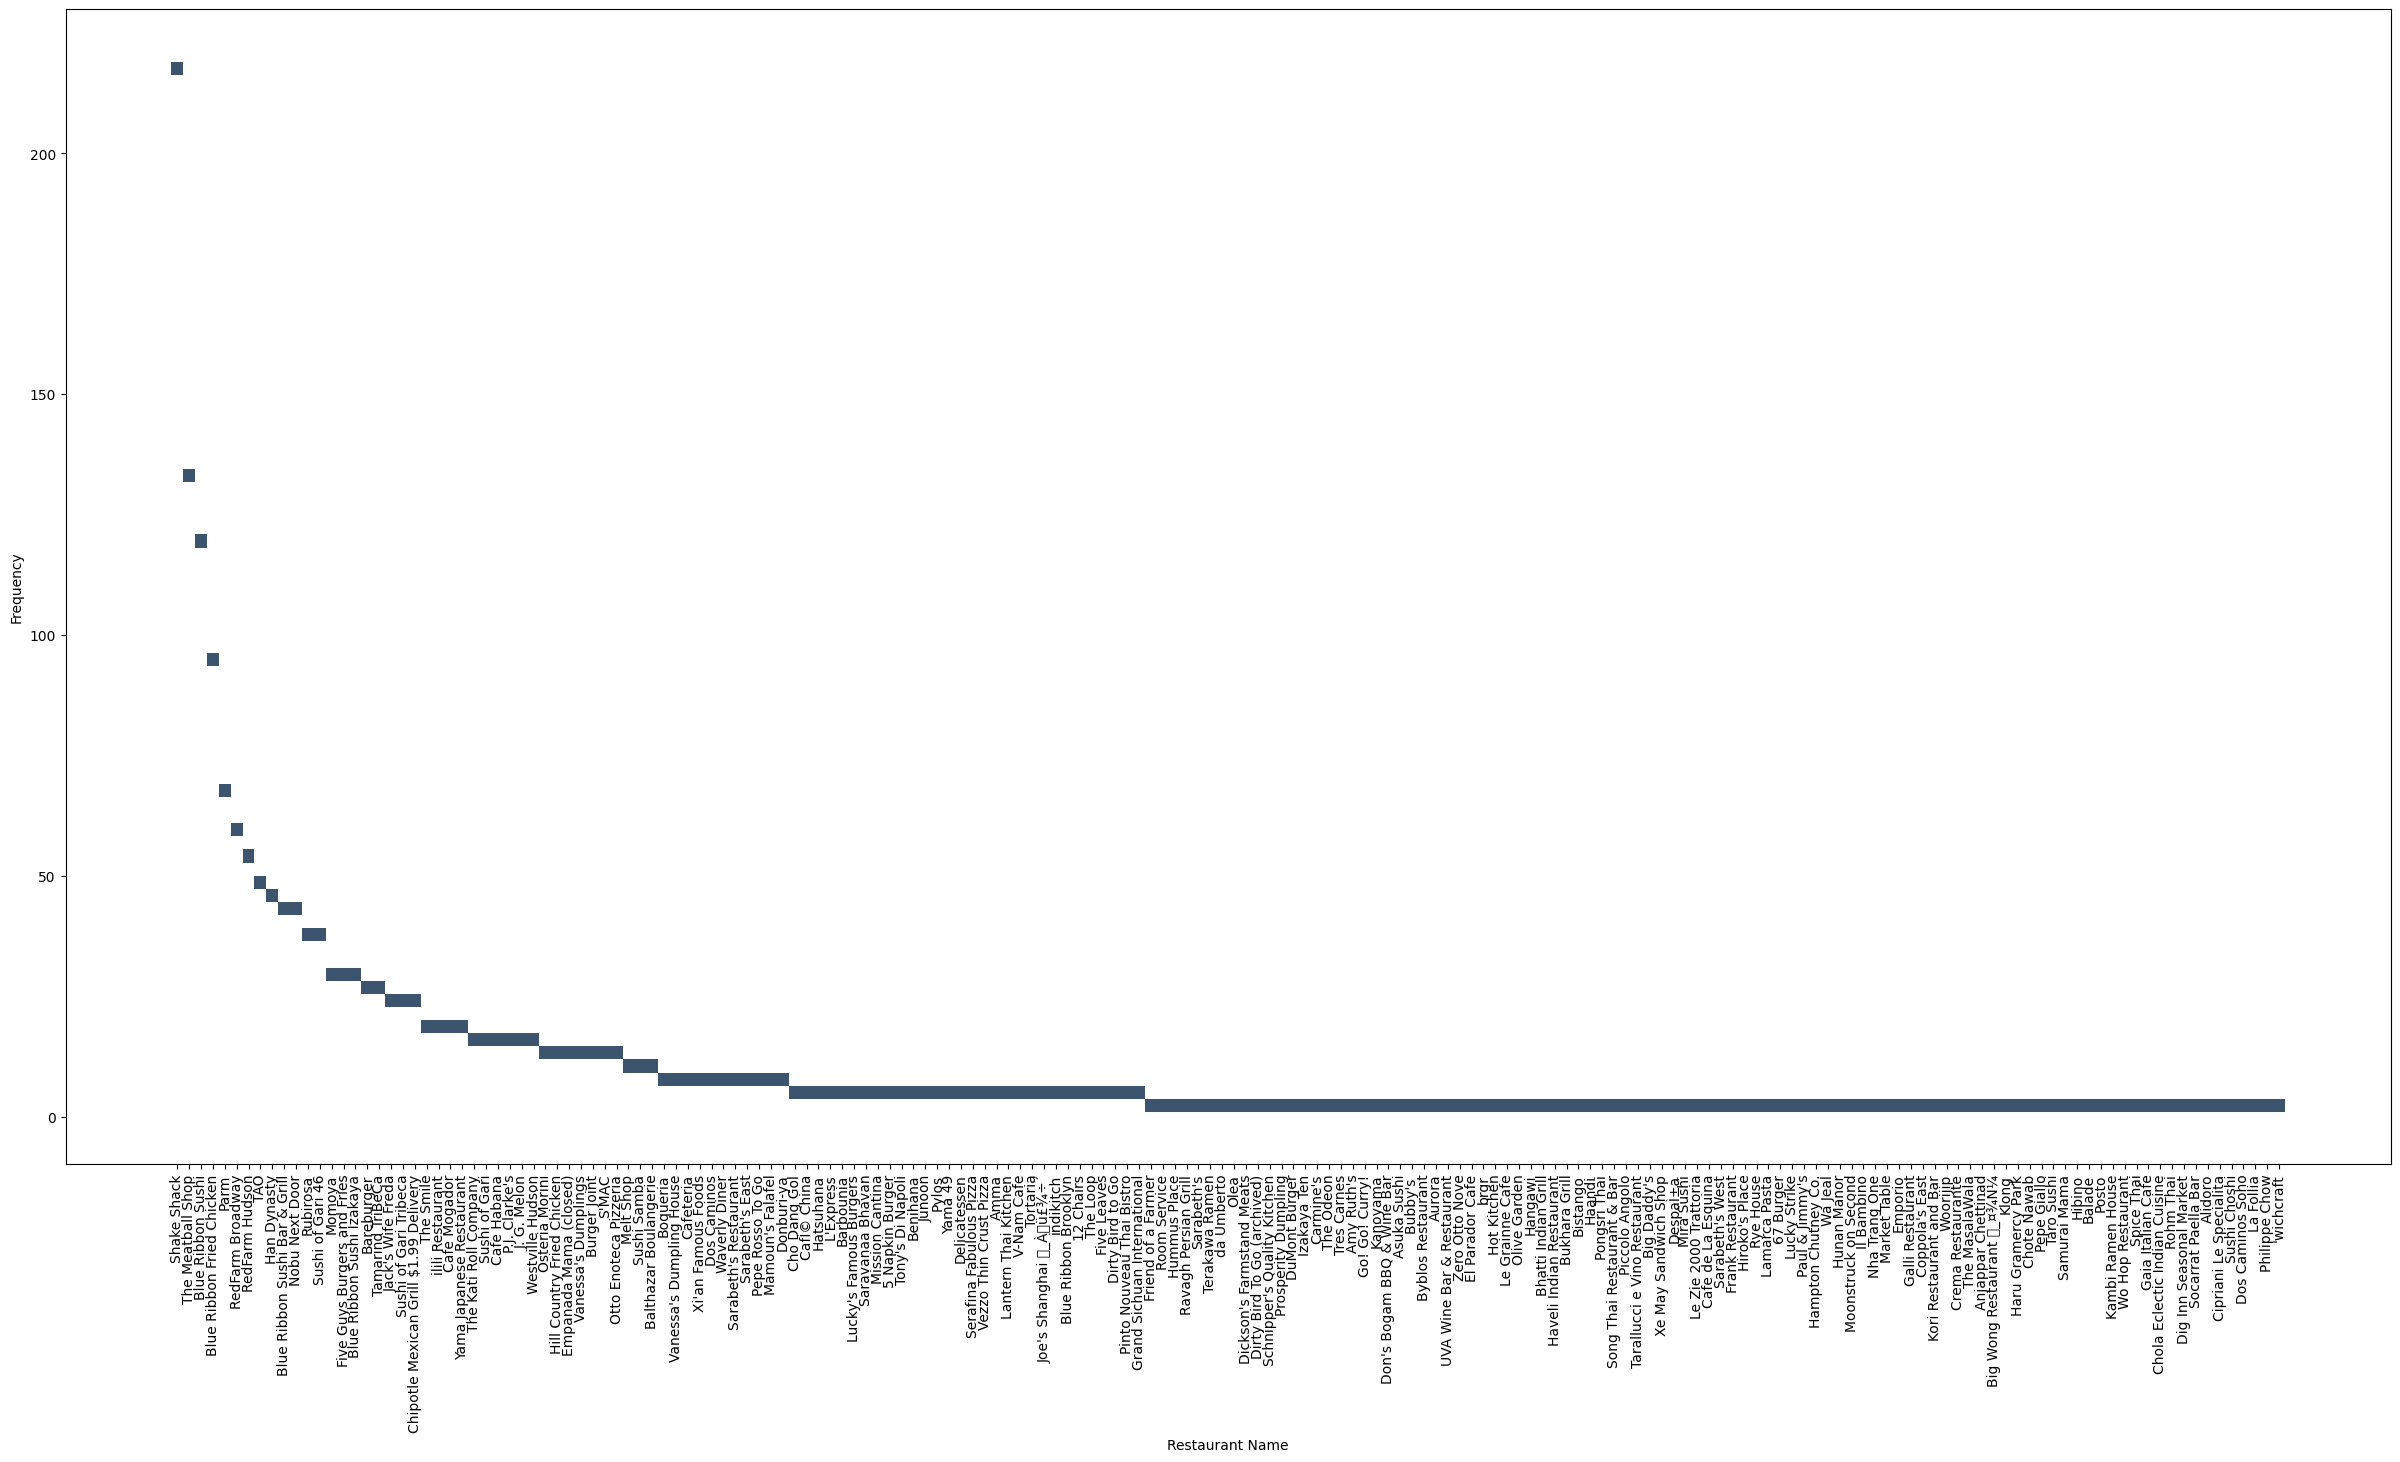

In [15]:
# Plots the number of orders per restaurant, from the highest to the lowest.
plt.figure(figsize=(30,15))
sns.histplot(data=restaurant_freq_df, x='Restaurant Name', y='Frequency');
plt.xticks(rotation=90)
plt.show()

In [16]:
## Retrieves the 5 top restaurants regarding the number of orders received.
df['restaurant_name'].value_counts().sort_values(ascending =False).head(5).reset_index()

,restaurant_name,count
0,Shake Shack,219
1,The Meatball Shop,132
2,Blue Ribbon Sushi,119
3,Blue Ribbon Fried Chicken,96
4,Parm,68


In [17]:
# Counts the number of restaurants with only one order.
restaurant_order= df['restaurant_name'].value_counts()
# Filters the number of restaurants with only 1 order
restaurants_one_order = restaurant_order[restaurant_order == 1]
restaurants_one_order = len(restaurants_one_order)

print(restaurants_one_order, 'restaurants received only one order')

50 restaurants received only one order


#### Observations:
*   There are **178** restaurants.
*   The top restaurant is **Shake Shack** with **219 orders**, followed by The Meatball (**132**), Blue Ribbon Sushi (**119**), Blue Ribbon Fried Chicken (**96**) and Parm (**68**).
*   **50** restaurants received only **1 order**.




**Cuisine types**

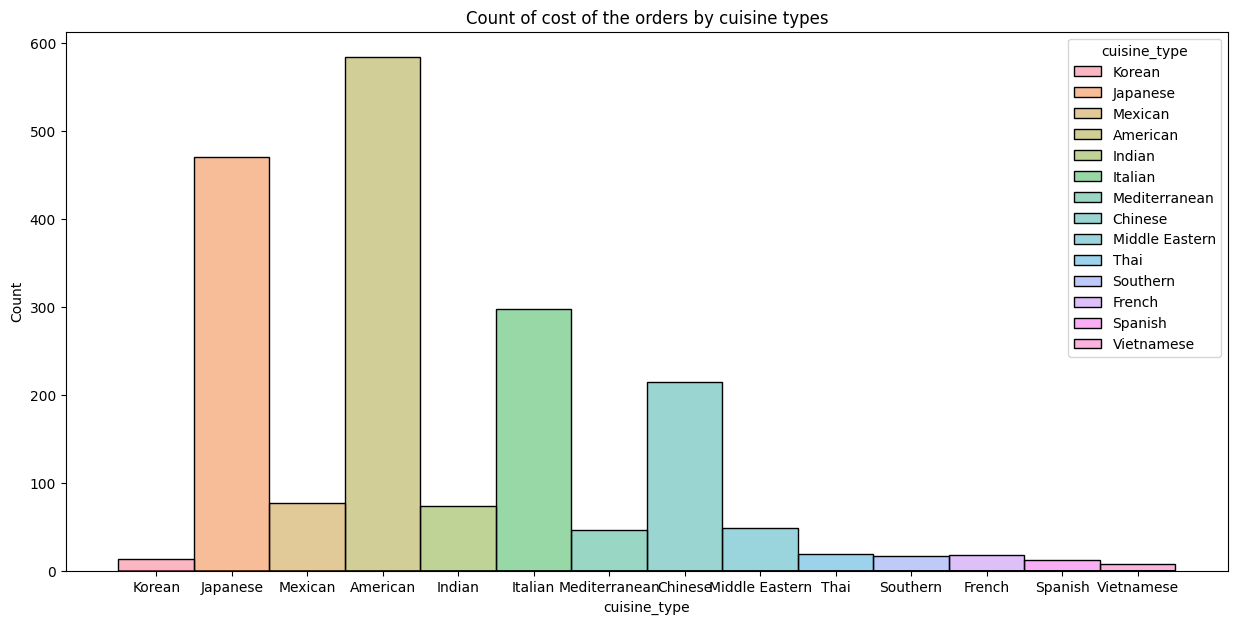

In [18]:
# Counts the number of cuisine types.
plt.subplots(figsize = (15,7))
sns.histplot(data = df, x = 'cuisine_type',  hue= 'cuisine_type');
plt.title('Count of cost of the orders by cuisine types');

#### Observations:
There are **14 cuisine types**:


*  **American** received the **highest number of orders**, followed by Japanese, Italian and Chinese.
*   **Vietnamese** received the **lowest number of orders**, followed by  Spanish, Korean and Southern.








In [19]:
## Retrieves the 5 top cuisine types regarding the number of orders received.
df['cuisine_type'].value_counts().sort_values(ascending =False).head(5).reset_index()

,cuisine_type,count
0,American,584
1,Japanese,470
2,Italian,298
3,Chinese,215
4,Mexican,77


#### **Observations**:
 **American Cuisine** is the top cuisine type with **584** orders placed.


**Cost of the order:**

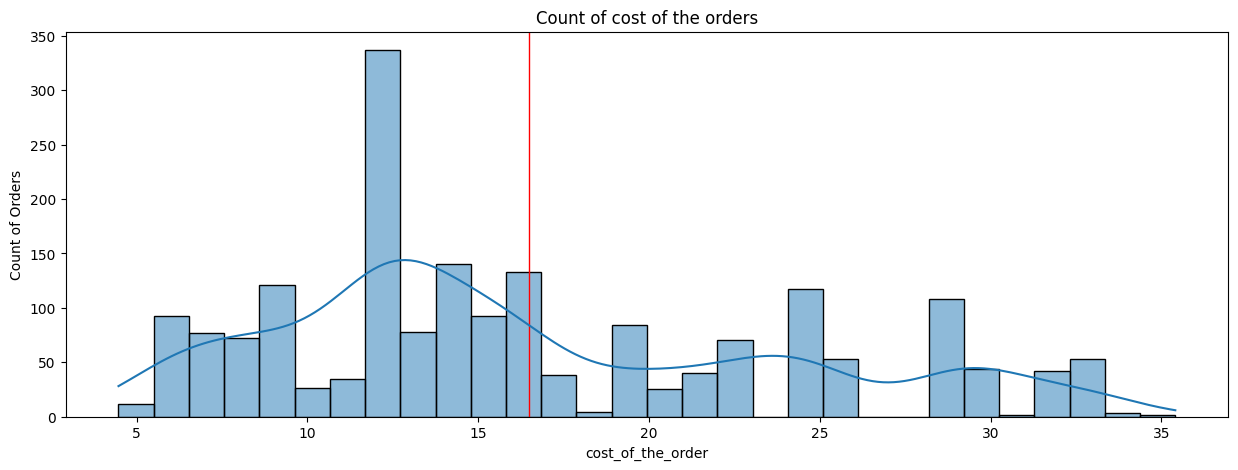

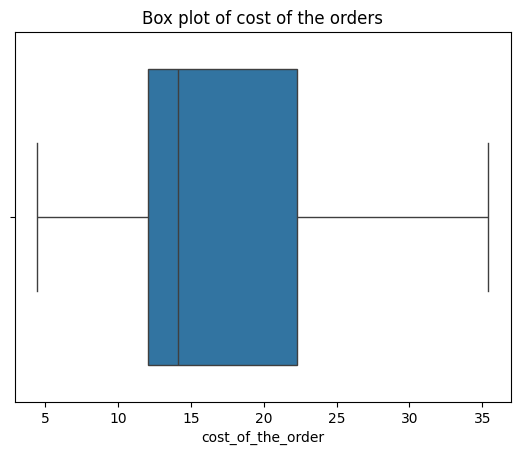

In [20]:
## Retrieves count regarding the cost of orders.
plt.figure(figsize = (15, 5))
plt.axvline(df['cost_of_the_order'].mean(),  color='r', linewidth=1)
sns.histplot(data = df, x = 'cost_of_the_order', bins=30, kde = True);
plt.ylabel('Count of Orders');
plt.title('Count of cost of the orders');
plt.show();
#Box plot of the cost of orders
sns.boxplot(data = df, x = 'cost_of_the_order');
plt.title('Box plot of cost of the orders');
plt.show();

In [21]:
# Counts the frequency of the cost of orders and displays the top 5 more.
df['cost_of_the_order'].value_counts().sort_values(ascending =False).head(5).reset_index()

,cost_of_the_order,count
0,12.18,86
1,12.13,82
2,12.23,47
3,24.20,42
4,29.10,37


In [22]:
# Retrieves statistical summary regarding the cost of order.
df['cost_of_the_order'].describe().T

,cost_of_the_order
count,1898.000000
mean,16.498851
std,7.483812
min,4.470000
25%,12.080000
50%,14.140000
75%,22.297500
max,35.410000


**Observations:**

The histogram and box plot show that 'cost_of_the_order' is right-skewed.

*  The histogram shows a long right tail and the mean is to the right of the peak.
*  The box plot shows a longer right whisker and is multimodal, which confirms for cost of the orders are skewed towards right.
*  The **average** order cost is  **14.14 USD**, with a **minimum** of **4.47 USD** and a **maximum** of **35.41 USD**.
*  The **majority** of the order cost is between **11 USD and 13 USD**.






**Food preparation time:**

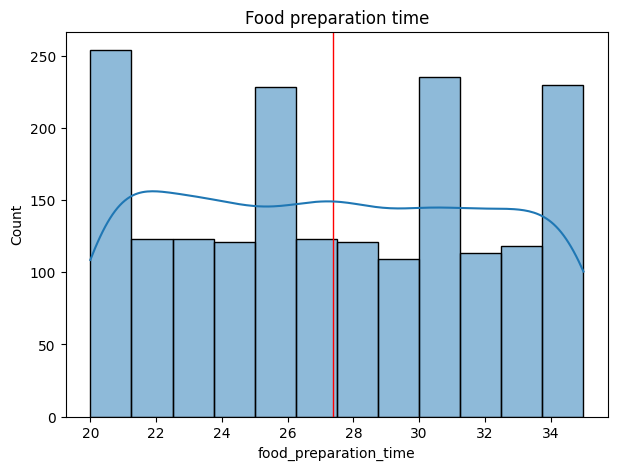

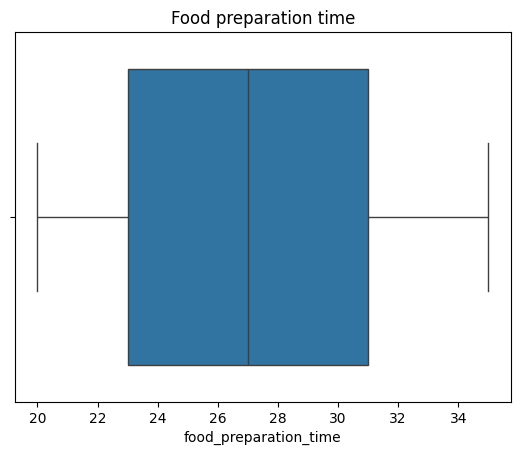

In [23]:
#  Plots food preparation time.
# Histogram
plt.figure(figsize = (7,5))
plt.axvline(df['food_preparation_time'].mean(), color='r', linewidth=1)
sns.histplot(data = df, x = 'food_preparation_time', kde = True);
plt.title('Food preparation time')
plt.show();
# Boxplot with ouliers
sns.boxplot(data=df,x='food_preparation_time', showfliers = True)
plt.title('Food preparation time')
plt.show()

#### **Observations**:
* Once an order is placed, it's prepared in a **minimum** time of **20 mins**, an **average** of **27 mins**, and a **maximum** of **35 mins**.
* The boxplot shows that data are not skewed. It confirms a symmetrical distribution as the mean and median of preparation time are very close. There are no outliers.





**Delivery time:**

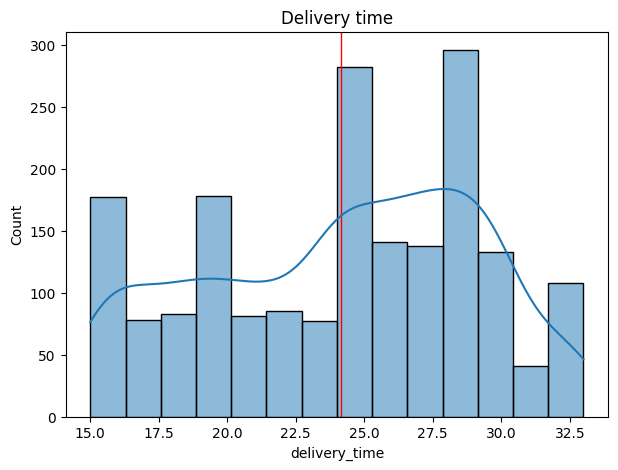

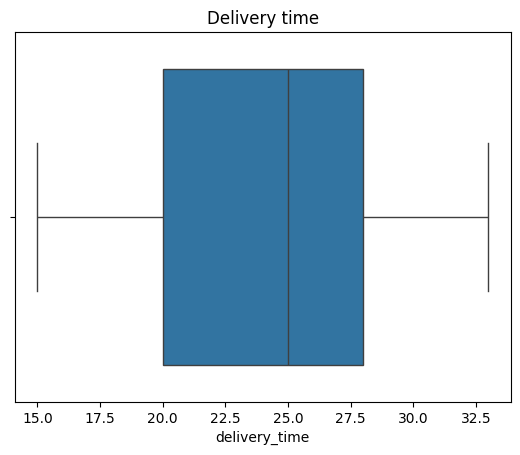

In [24]:
#  Plots of histogram of delivery time.
plt.figure(figsize = (7,5))
plt.axvline(df['delivery_time'].mean(), color='r', linewidth=1)
sns.histplot(data = df, x = 'delivery_time', kde = True);
plt.title('Delivery time')
plt.show();
# Boxplot with ouliers
sns.boxplot(data=df,x='delivery_time', showfliers = True)
plt.title('Delivery time');
plt.show()


Observations:
* **The delivery time** data is skewed to the left, with no outliers.

**Day of the Week:**

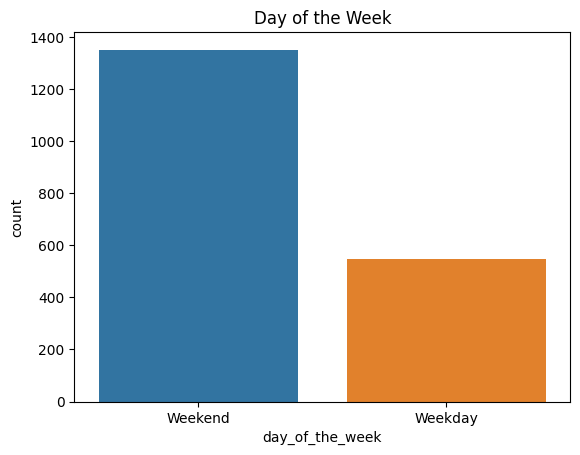

In [25]:
# Plots the count by days of the week.
sns.countplot(data = df, x = 'day_of_the_week', hue='day_of_the_week');
plt.title('Day of the Week');
plt.show()

In [26]:
# Calculates the percentage of orders regarding the day of the week.
def calculate_percentages(arr):
    total = np.sum(arr)
    percentages = (arr / total) * 100
    return percentages
days = df['day_of_the_week'].value_counts()
values = np.array(days)
percentages = (calculate_percentages(values))
print('There are', values[0], 'orders on Weekends, which represents', round(percentages[0],2), '% of the total orders.')
print('There are', values[1], 'orders on Weekdays, which represents', round(percentages[1],2), '% of the total orders.')

There are 1351 orders on Weekends, which represents 71.18 % of the total orders.
There are 547 orders on Weekdays, which represents 28.82 % of the total orders.


#### **Observations**:
Most orders are placed on **weekends**:
*   **Weekends** represents **71.18 %** of the total orders.
*   **Weekdays**represents **28.82 %** of the total orders.


### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received?

In [27]:
# Retrieves the 5 top restaurants regarding the number of orders received
df['restaurant_name'].value_counts().sort_values(ascending =False).head(5).reset_index()

,restaurant_name,count
0,Shake Shack,219
1,The Meatball Shop,132
2,Blue Ribbon Sushi,119
3,Blue Ribbon Fried Chicken,96
4,Parm,68


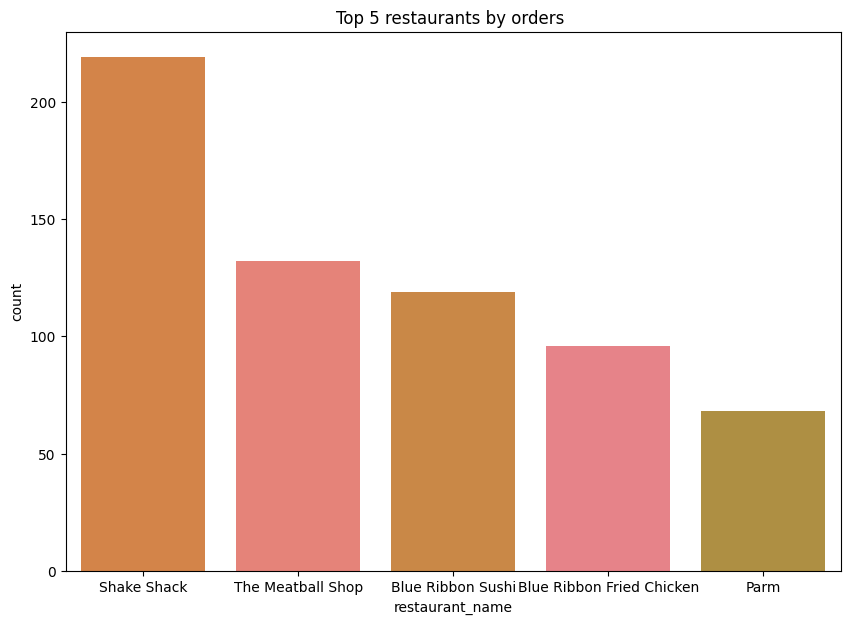

In [28]:
# Plots the 5 highest orders by type of cuisine.
plt.subplots(figsize = (10,7))
sns.countplot(data = df, x = 'restaurant_name', hue='restaurant_name', order = df.restaurant_name.value_counts().iloc[:5].index);
plt.title('Top 5 restaurants by orders ');

#### **Observations**:
The following restaurants are the top 5 in terms of the number of orders received:
1. Shake Shack (219 orders)
2. The Meatball Shop (132 orders)
3. Blue Ribbon Sushi (119 orders)
4. Blue Ribbon Fried Chicken (96 orders)
5. Parm (68 orders)


### **Question 8**: Which is the most popular cuisine on weekends?

In [29]:
# Creates w_df; a dataset for Weekend orders. mpw is list of Cusine types ordered from the highest.
we_df = df[df['day_of_the_week'] == 'Weekend']
mpw = print(we_df['cuisine_type'].value_counts())

cuisine_type
American          415
Japanese          335
Italian           207
Chinese           163
Mexican            53
Indian             49
Mediterranean      32
Middle Eastern     32
Thai               15
French             13
Korean             11
Southern           11
Spanish            11
Vietnamese          4
Name: count, dtype: int64


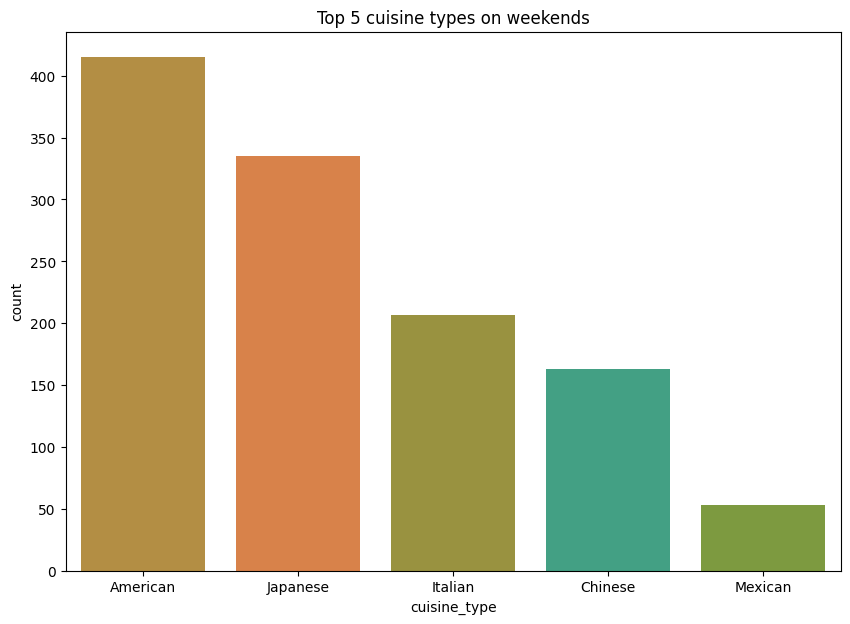

In [30]:
# Plots the 5 highest orders by type of cuisine.
plt.subplots(figsize = (10,7))
sns.countplot(data = we_df, x = 'cuisine_type', hue='cuisine_type', order = df.cuisine_type.value_counts().iloc[:5].index);
plt.title('Top 5 cuisine types on weekends');

#### **Observations**:
**American cuisine is the most popular on the weekends**, with **415** orders, ahead of Japanese (2nd), Italian (3rd), Chinese 94th) and Mexican (5th).

**Vietnamese cuisine** (**14th**) is the less popular cuisine, behind **Korean**, **Southern** and **Spanish** which are **11th**.



### **Question 9**: What percentage of the orders cost more than 20 dollars?

In [31]:
# Retrieves the shape of the DataFrame for which the cost_of_the_order is above 20 USD and the percentage
print(df[df['cost_of_the_order']>20].shape)
percent= (len(df[df['cost_of_the_order']>20])/len(df))*100
print(round(percent, 2))
print('There are', df[df['cost_of_the_order']>20].shape[0], 'orders above 20 USD, representing', (round(percent, 2)),'% of orders.')

(555, 9)
29.24
There are 555 orders above 20 USD, representing 29.24 % of orders.


#### **Observations**:
There are **555** orders above **20 USD**, representing **29.24%** of orders.

### **Question 10**: What is the mean order delivery time?

In [32]:
# Retrieves the rounded mean of the delivery time
print('The mean order delivery time is', round(df['delivery_time'].mean(), 2),'mins.')

The mean order delivery time is 24.16 mins.


#### **Observations**:
The mean order delivery time is **24.16 mins.**


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed

In [33]:
# Retrieves the top 3 customers with the highest count of orders
most_3 = df['customer_id'].value_counts().sort_values(ascending = False).head(3).reset_index()
print ('Most 3', most_3)


Most 3    customer_id  count
0        52832     13
1        47440     10
2        83287      9


#### **Observations**:
The following customers who are the **top 3 most frequent customers** will receive a **20% discount vouchers**:

1. 52832, with 13 orders placed
2. 47440, with 10 orders placed
3. 83287, with 9 orders placed






#### **Multivariate Analysis**

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables)

**Multivariate relashionship:**

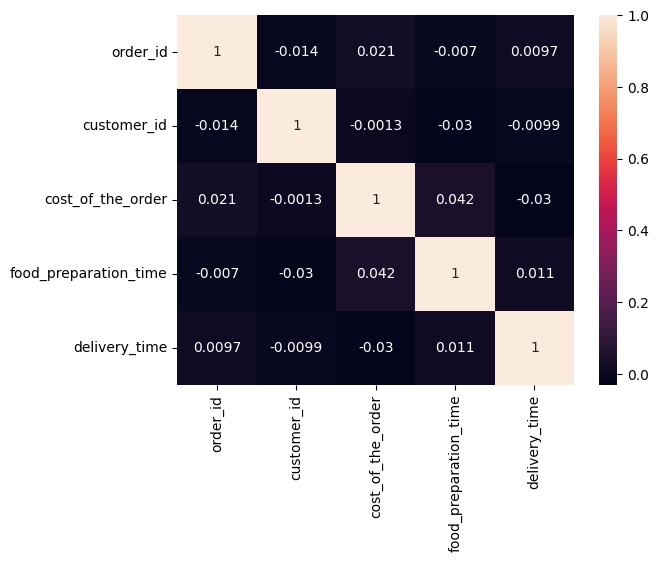

In [34]:
# Heatmap of correlation between numerical variables.
sns.heatmap(data=df[["order_id",	"customer_id",  "cost_of_the_order", "food_preparation_time","delivery_time"]].corr(), annot=True, cbar='Spectral',);

**Observations:**

From the heatmap generated for the correlation matrix:

• There is no high positive or negative corelation between the numeric variables.

• The cost of the order has a very loose positive correlation with and the food preparation time and a very loose negative correlation with the delivery time.

**Day of week and Cusine type**

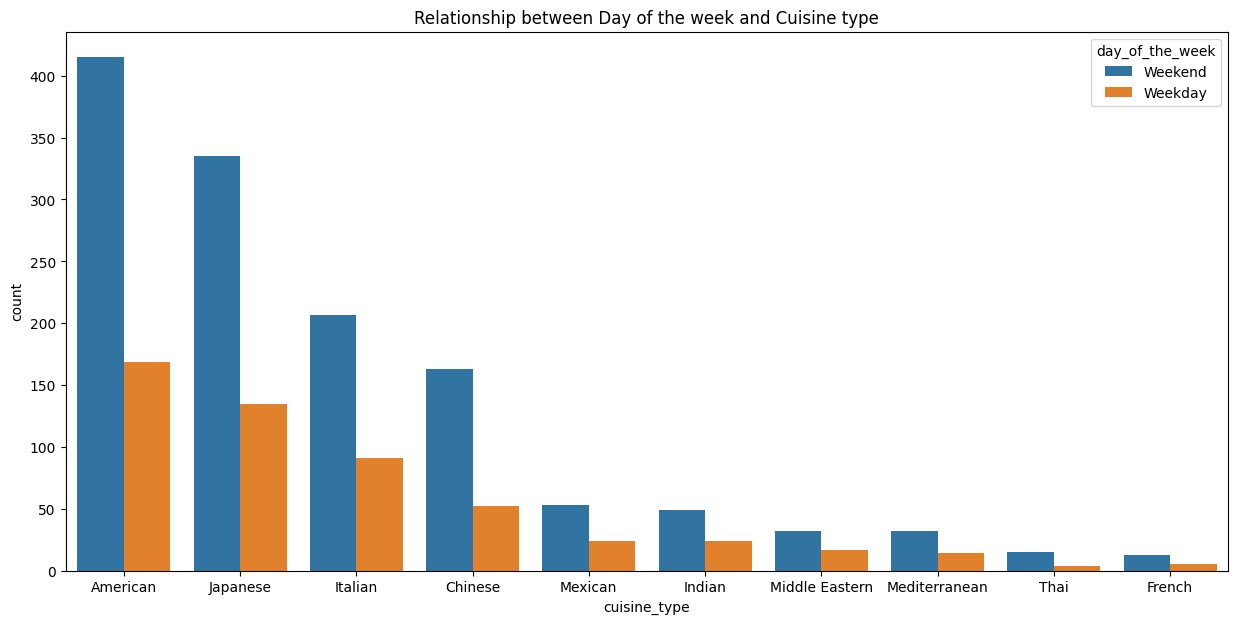

In [35]:
# Plots the relation between Day of the week and cuisine type.
plt.figure(figsize = (15,7))
sns.countplot(data = df, x = 'cuisine_type', hue = 'day_of_the_week', order = df.cuisine_type.value_counts().iloc[:10].index);
plt.title('Relationship between Day of the week and Cuisine type');

**Observations:**
* **Day of the week** has no influence over the selection of *cuisine type*.

* **American, Japanese, Italian, and Chinese** cuisine types remain the most popular throughout the entire week.

**Rating, Food Prepation Time and Delivery Time:**

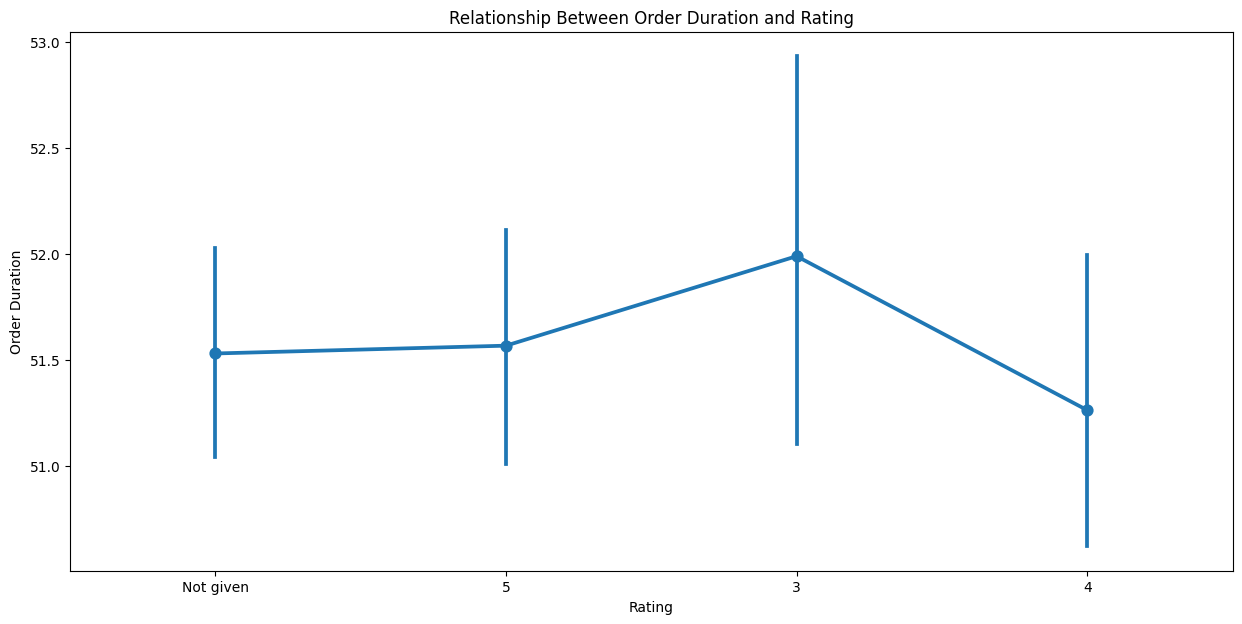

In [36]:
# Plots the relationship between Rating, Food Prepation Time and Delivery Time
df['order_duration'] = df['food_preparation_time'] + df['delivery_time']
plt.figure(figsize=(15, 7))
sns.pointplot(data=df, x='rating', y='order_duration')
plt.ylabel('Order Duration')
plt.xlabel('Rating')
plt.title('Relationship Between Order Duration and Rating');
plt.show()

**Observations**:


*   From the customer's perspective, the total duration is from the order placement to the delivery.
*   Rating is higher when the order duration time is low.
*   **38%** of the orders were not rated while the delivery time is lower than **24.25 mins**, which corresponds to a rating of **5**. We can assume that the rating and the delivery time are not correlated.




**Day of the week and delivery time**:

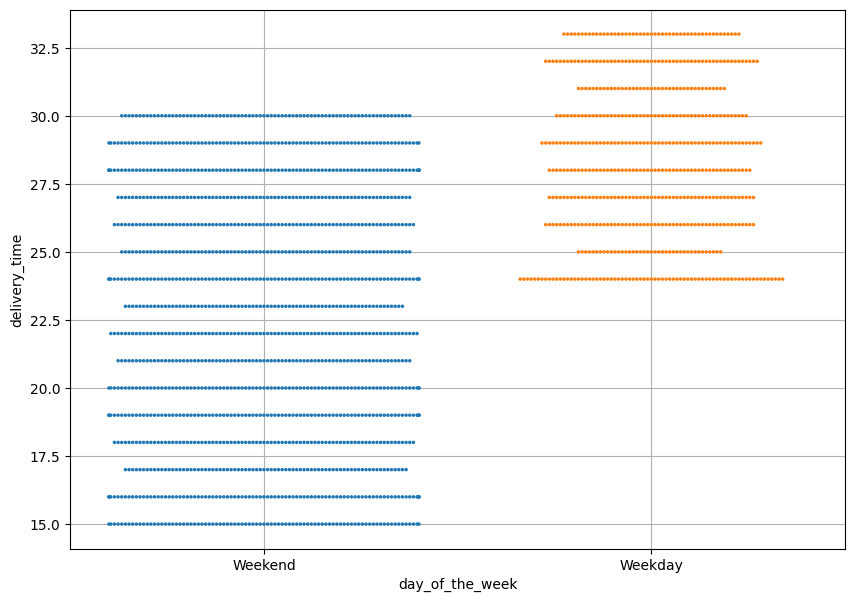

In [37]:
# Relationship between Day of the Week and Delivery Time
plt.figure(figsize=(10, 7))
sns.swarmplot(data = df, x='day_of_the_week', y ='delivery_time', hue = 'day_of_the_week', size=2.5);
plt.grid ()

In [38]:
# Retrieves the average delivery time for Weedays and Weekends
df.groupby(['day_of_the_week'])['delivery_time'].mean()

,delivery_time
day_of_the_week,
Weekday,28.340037
Weekend,22.470022


**Observations:**

Delivery times are higher on weekdays than on weekends:

*   Weekday: 28 mins
*   Weekend: 22 mins


**Rating and cost of the order:**

In [39]:
# Retrieves the average cost and ratings for orders.
df.groupby(['rating'])['cost_of_the_order'].mean()

,cost_of_the_order
rating,
3,16.223351
4,16.710337
5,16.965697
Not given,16.085340


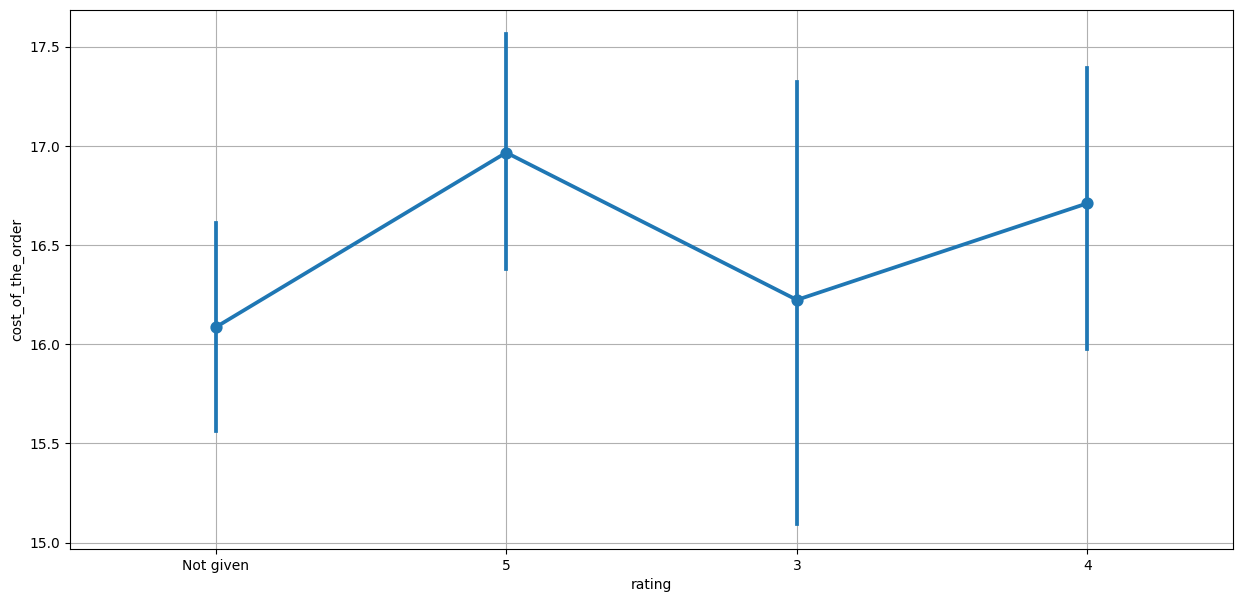

In [40]:
# Plots the relashionship between rating and cost of order
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'cost_of_the_order', data = df)
plt.grid ()
plt.show();

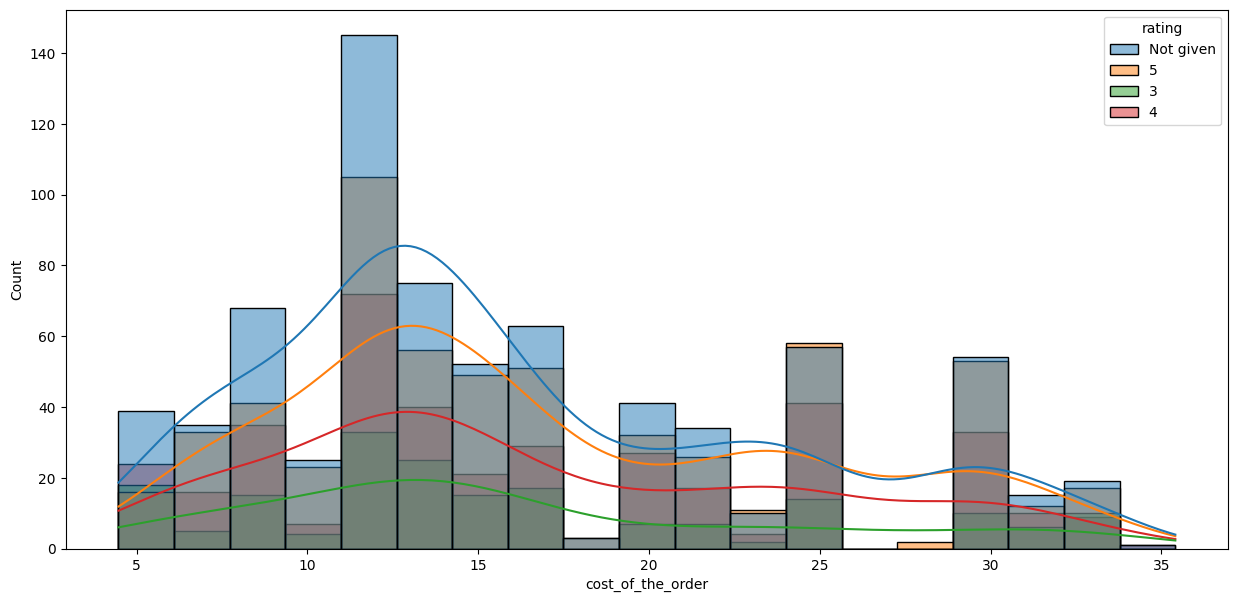

In [41]:
# Plots the histogram of the relashionship between rating and cost of order
plt.figure(figsize = (15,7))
sns.histplot(data = df, x = 'cost_of_the_order', hue = 'rating', kde = True);

#### **Observations**:
From the histogram, most of the ratings are provided by the same cluster of customers who's purchase is between **11 USD** and **13 USD**.

From the barplot shows that the **Higher ratings** (**4 & 5**) that show better customer experience) indicate a slighter **higher mean order cost**.

* **5**	: **16.97 USD**
* **4**	: **16.71 USD**
* **3**	: **16.22 USD**

High cost orders (**above 16 USD**) received higher rating **(3, 4, 5)**.





**Cost of the order and day of the week:**

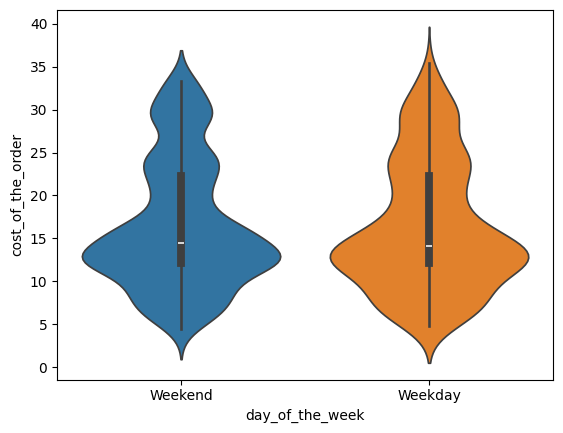

In [42]:
# Shows the violin plot of the relation between the day of the week and the cost of the order
sns.violinplot(data=df,x='day_of_the_week', y='cost_of_the_order', hue='day_of_the_week');

**Observations:**

There is no clear relation between the cost of the order and the day of the week.



**Rating and cuisine type:**

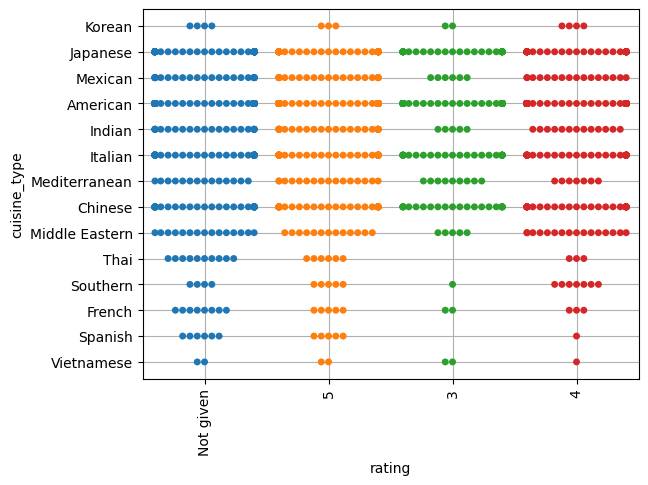

In [43]:
# Plots the relation between the day of the week and the cost of the order
sns.swarmplot(data = df, y='cuisine_type', x = 'rating', hue = 'rating');
plt.grid ()
plt.xticks(rotation=90);

**Observations:**


* The mean rating is **4.33**. **All cuisine** types have ratings ranging from 4 to 5, but **Mediterranean** and **Vietnamese** have a few ratings between 3 and 4.
*   **Spanish** cuisine has a **perfect rating of 5** and a few outliers at 4.



**Cuisine type and cost of the order:**

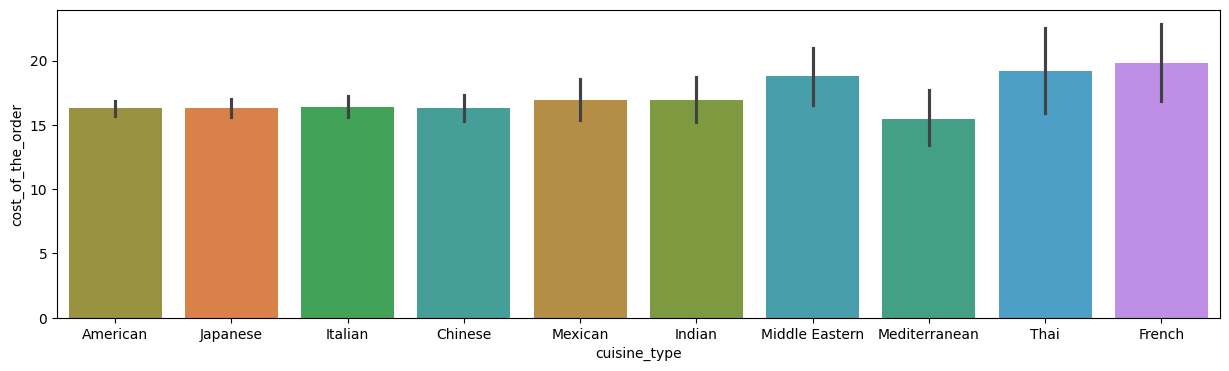

In [44]:
# Plots the relation between the cuisine types and the cost of the order
plt.figure(figsize = (15,4))
sns.barplot(data = df, x = 'cuisine_type', y = 'cost_of_the_order', hue = 'cuisine_type', order = df.cuisine_type.value_counts().iloc[:10].index);

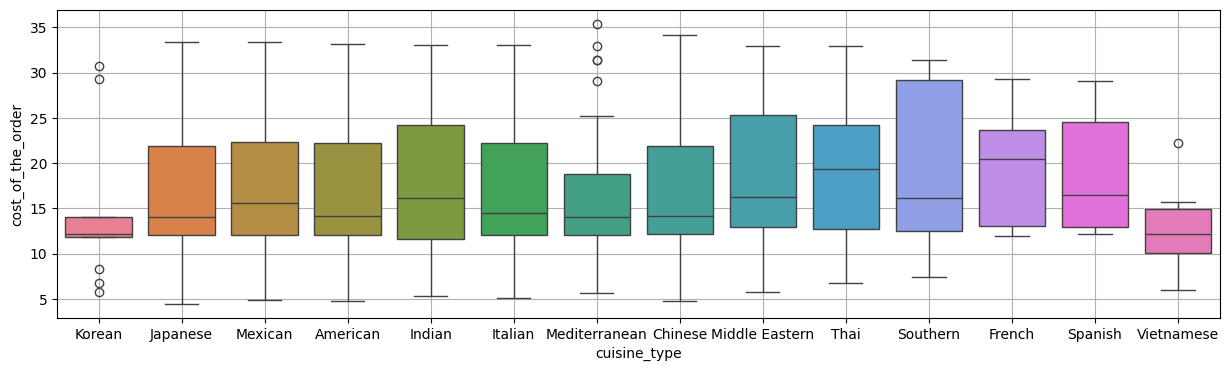

In [45]:
# Checking for outliers - cuisine types and the cost of the order
plt.figure(figsize = (15,4))
sns.boxplot(data = df, x = 'cuisine_type', y = 'cost_of_the_order', hue='cuisine_type');
plt.grid()

**Observations:**

The histogram shows the top cuisine types with the highest mean order costs.
The scatter plot shows that **Japanese, Mexican, American, Indian, Chinese, and Mediterranean cuisines** have a significant number of orders with costs between **5 USD** and **25 USD**.

There are fewer orders above **30 USD,** with only **one Mediterranean above 35 USD**.

**French** and **Spanish cuisines** have orders between **10** and **30 USD**.

The boxplot shows few outliers:
*  Korean: **5** (2 high costs and 3 low costs)
*  Mediterranean: **4** (4 high costs)
*  Vietnamese: **1** (1 high cost)

**Cuisine type and Order duration:**

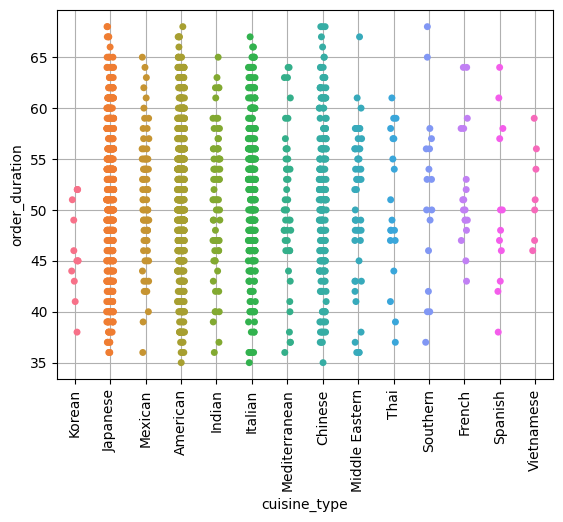

In [46]:
# Strip plot of the relation between the order duration (food prepation time + delivery time) and the cuisine type
df['order_duration'] = df['delivery_time'] + df['food_preparation_time']
sns.stripplot(data = df, y = 'order_duration', x ='cuisine_type', hue='cuisine_type')
plt.grid()
plt.ylabel("order_duration")
plt.xticks(rotation=90);

In [47]:
# Retrieves statistical summary regarding the cost of order
df['order_duration'].describe()

,order_duration
count,1898.000000
mean,51.533720
std,6.833603
min,35.000000
25%,47.000000
50%,52.000000
75%,56.000000
max,68.000000


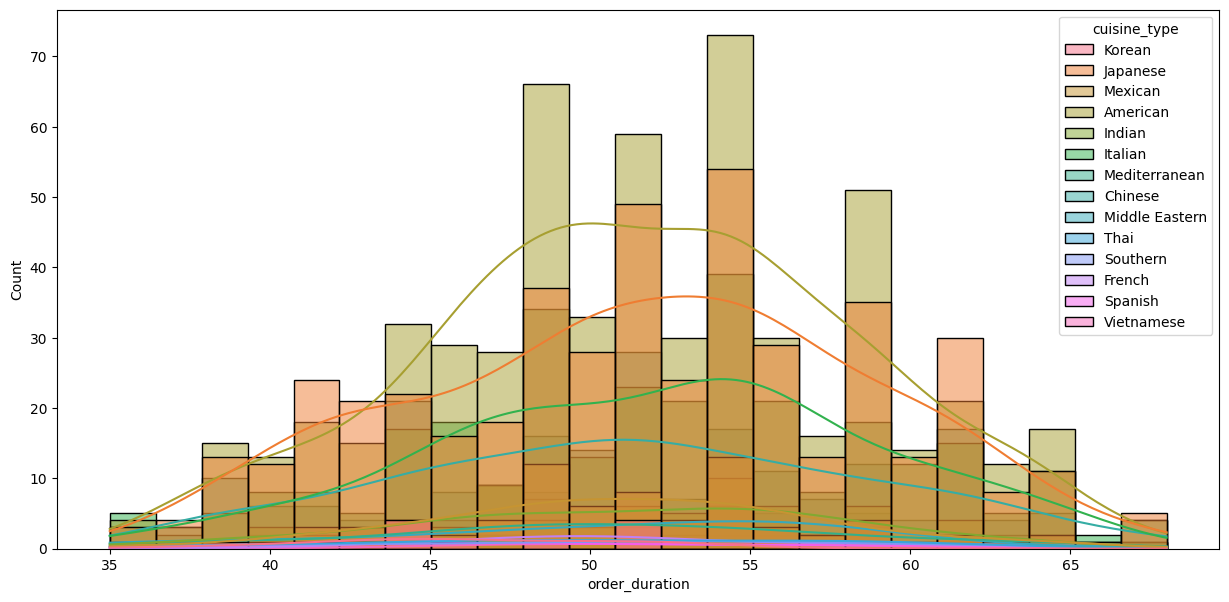

In [48]:
# Plots the histogram of the relashionship between rating and cost of order
plt.figure(figsize = (15,7))
sns.histplot(data = df, x = 'order_duration', hue = 'cuisine_type', kde = True);

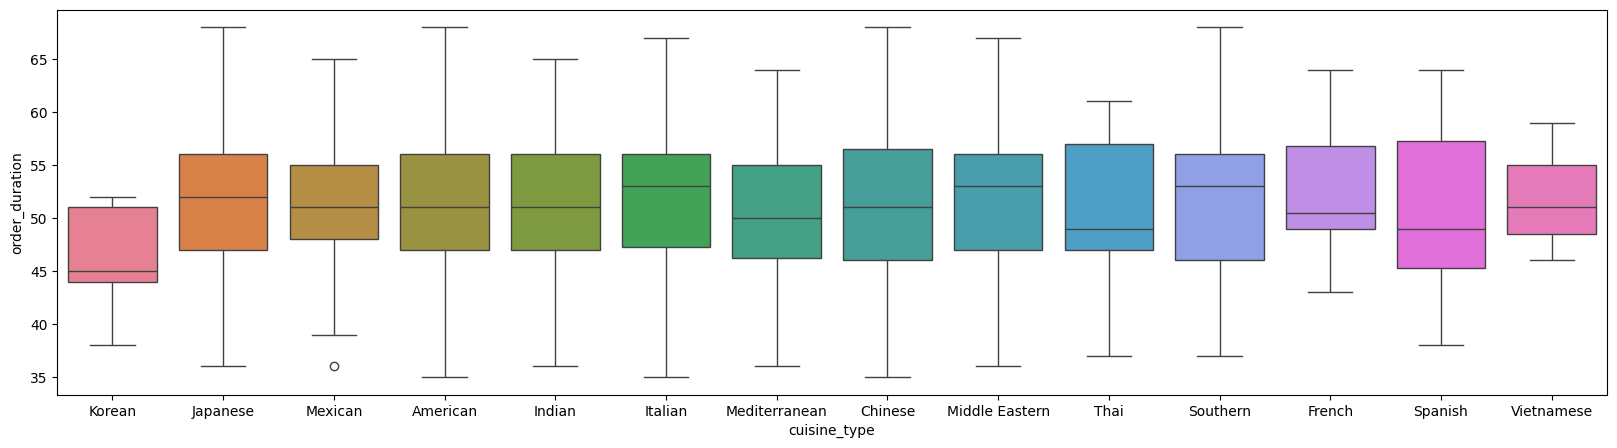

In [49]:
# Box plot of the relation between the delivery time and the cuisine type to check for outliers
plt.figure(figsize = (20,5))
sns.boxplot(data = df, x = 'cuisine_type', y= 'order_duration', hue= 'cuisine_type');

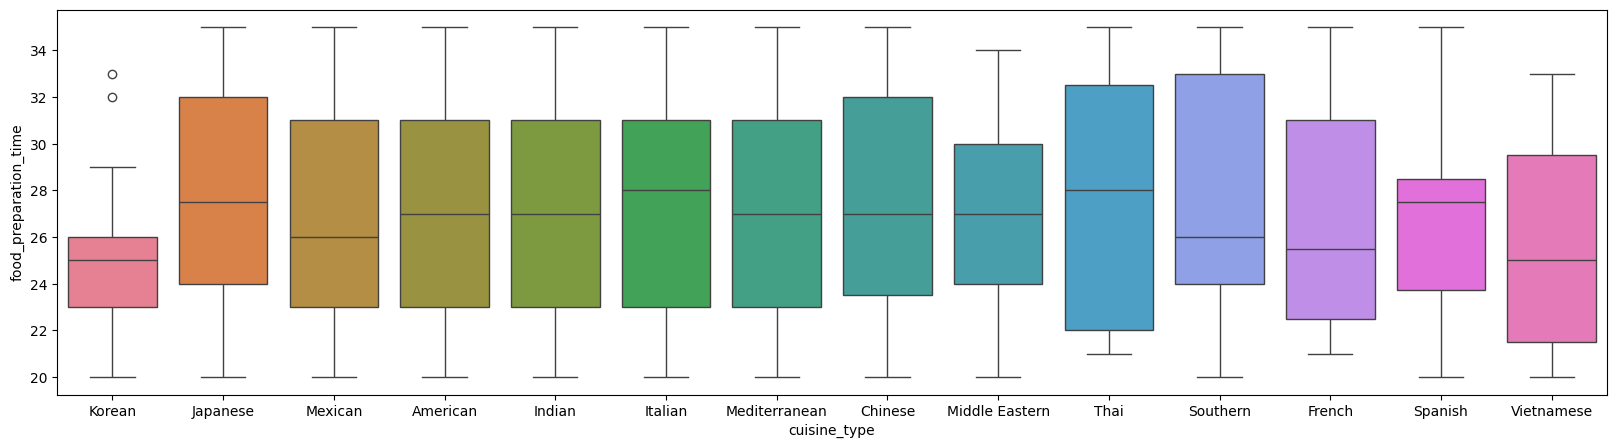

In [50]:
# Box plot of the relation between the food preparation time and the cuisine type to check for outliers
plt.figure(figsize = (20,5))
sns.boxplot(data = df, x = 'cuisine_type', y= 'food_preparation_time', hue= 'cuisine_type');

#### **Observations**:

* When the customer places them, orders are delivered in a minimum of **35 mins**, an average of **52 mins**, and a maximum of **68 mins**.
* There is **1 outlier** in the delivery time for **Vietname cuisine**.
* There are **2 outliers** in the food preparation time for **Korean cuisine**.
* **Southern**, **Thai**, **Chinese** and **Japanese** cuisines have a **longer preparation time** around **30 mins**.
*  **Thai** and **French** cuisines take a **minimum preparation time** around **21 mins**.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer

In [51]:
# Creates a dataset from the initial data frame, with only rows with rating values of 4 and 5
df_hr = df.drop(df.index[(df['rating'] != '4') & (df['rating'] != '5')])
df_hr

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,order_duration
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,51
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,49
8,1477174,121706,Anjappar Chettinad,Indian,16.44,Weekday,5,21,26,47
9,1477311,39705,Bukhara Grill,Indian,7.18,Weekday,5,29,26,55
11,1478437,221206,Empanada Mama (closed),Mexican,8.10,Weekend,5,23,22,45
...,...,...,...,...,...,...,...,...,...,...
1888,1477353,106324,The Meatball Shop,Italian,16.20,Weekend,5,21,26,47
1890,1477316,164776,TAO,Japanese,15.67,Weekend,5,20,22,42
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17,48
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31,19,50


In [52]:
# Selects only restaurants that appear more than 50 times.
df_hr['restaurant_name'].value_counts() > 50

,count
restaurant_name,
Shake Shack,True
The Meatball Shop,True
Blue Ribbon Sushi,True
Blue Ribbon Fried Chicken,True
RedFarm Broadway,False
...,...
Izakaya Ten,False
Taro Sushi,False
Bhatti Indian Grill,False


In [53]:
# Selects only rows where the 'restaurant_name' column contains one of four specific restaurant names from the previous code result.
df_hr1 = df_hr.drop(df_hr.index[(df_hr['restaurant_name'] != 'Shake Shack')
                   &(df_hr['restaurant_name'] != 'Blue Ribbon Fried Chicken')
                   &(df_hr['restaurant_name'] != 'The Meatball Shop')
                   &(df_hr['restaurant_name'] != 'Blue Ribbon Sushi')])
df_hr1

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,order_duration
12,1476966,129969,Blue Ribbon Fried Chicken,American,24.30,Weekend,5,23,17,40
15,1477414,66222,Shake Shack,American,16.20,Weekend,5,33,25,58
19,1477354,67487,Blue Ribbon Sushi,Japanese,16.20,Weekend,4,35,26,61
22,1478287,150599,Shake Shack,American,29.10,Weekday,5,21,30,51
26,1476995,371590,The Meatball Shop,Italian,21.88,Weekday,5,24,27,51
...,...,...,...,...,...,...,...,...,...,...
1879,1477132,110792,Blue Ribbon Sushi,Japanese,12.13,Weekend,5,28,15,43
1880,1477466,222734,Shake Shack,American,13.97,Weekend,5,35,27,62
1885,1477550,97324,Shake Shack,American,29.05,Weekday,4,27,29,56
1886,1478277,48282,The Meatball Shop,American,14.50,Weekend,5,34,25,59


In [54]:
# Changes the type of variable to integer
for col in ['rating']:
    df_hr1[col] = df_hr1[col].astype('int')


In [55]:
 # Shows the names of the top 5 restaurants and their average rating, sorted from highest to lowest.
df_hr1.groupby('restaurant_name')['rating'].mean().sort_values(ascending = False).head()

,rating
restaurant_name,
The Meatball Shop,4.716216
Blue Ribbon Fried Chicken,4.603774
Blue Ribbon Sushi,4.561404
Shake Shack,4.545455


#### **Observations**:

Four restaurants meet the requirements to qualify for the promotional offer.

They all have more than 50 rating count and have an average rating greater than 4.

1. The Meatball Shop
2. Blue Ribbon Fried Chicken
3. Shake Shack
4. Blue Ribbon Sushi

**The Meatball Shop** has the highest rate with an average rating of **4.7**.


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders

In [56]:
# Calculates the revenue by applying 25% charges for costs greater than 20 USD and 15% of costs between 5 USD and 20 USD, then summing up.
sum = 0
for i in df['cost_of_the_order']:
    if (i > 20):
        sum = sum + (i*0.25)
    elif (5 < i < 20):
        sum = sum + (i*0.15)
    else:
        sum = sum + (i*0)
print('The net revenue generated on all orders is', "{:.2f}".format(sum), 'USD')

The net revenue generated on all orders is 6166.30 USD


#### **Observations**:

The net revenue generated on all orders is **6166.30 USD**.


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered)

In [57]:
#  Retrieves the order duration (= Food Preparation Time + Delivery Time) greater than 60 mins
df['order_duration'] = df['food_preparation_time'] + df['delivery_time']
sum = 0
for i in df['order_duration']:
    if i > 60:
        sum = sum + 1
print('Percentage:', '{:.2f}%'.format(sum/len(df['order_duration'])*100))

Percentage: 10.54%


#### **Observations**:
There are **10.54%** of total orders that exceed a total delivery time of 60 minutes from the time the order is placed.


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends?

In [58]:
# Delivery time variation on weedays and weeends
df.groupby(['day_of_the_week'])['delivery_time'].mean()

,delivery_time
day_of_the_week,
Weekday,28.340037
Weekend,22.470022


#### **Observations:**

The average delivery time on weekdays is greater than during the weekend. Reasons may include:

*  Difficult traffic conditions and congestion during the weekdays are making the delivery higher than on the weekends.
*  Lesser delivery drivers during the weekends compared to weekdays.


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations)

## **Conclusions**:
1.	**Order patterns and cuisine demand:**
  *   Majority of orders (71%) occur on weekends, with American, Japanese, Italian, and Chinese cuisines making up over 80% of total orders.
  *   Higher demand for specific cuisines (especially American) aligns with peak weekend periods.

2.	**Delivery and preparation efficiency:**
  *   Average food preparation time is 27.37 minutes, and delivery time is 24.16 minutes, with weekdays showing longer delivery times, likely due to traffic.
  *   About 10% of orders take over an hour from placement to delivery.

3.	**Customer retention and ratings:**

  *   Only **38%** of customers provided ratings; customer retention remains low, with **65%** making only a single order.

## **Recommendations**:
By streamlining operations, engaging customers, and strategically promoting offerings, FoodHub can improve satisfaction, optimize efficiency, and increase revenue:


1.  **Increase weekday demand:** To even out demand and drive sales on slower days, offer weekday discounts or mid-week promotions on top cuisines like American and Japanese. This can also help manage delivery times by spreading demand more evenly across the week.

2.  **Enhance delivery efficiency:** To improve delivery speed, especially on weekdays, analyze high-traffic areas and peak times, adjusting routes accordingly. Partnering with third-party services could also help meet weekday demand. Additionally, informing customers of estimated delivery times for longer waits can help set expectations.

3.  **Encourage customer feedback and loyalty:** Incentivize ratings by offering a discount on the next order in exchange for feedback. Launch loyalty rewards to encourage repeat orders, enhancing customer retention and gaining insights into customer preferences.
4.  **Feature popular restaurants and cuisines:** Showcase popular restaurants like Shake Shack and The Meatball Shop, especially on weekends when traffic is high. Featuring these well-rated, high-demand options with limited-time offers or promotions can attract additional customers.

5.   **Introduce tiered pricing incentives:** Orders over $20 are less common, so consider offering free delivery or discounts on higher-cost orders to boost average order value. This approach can increase revenue while encouraging customers to spend more per transaction.




---